# Sales Forecasting

**Creating forecasting models to forecaste future sales. Typical time series problem.**

# Steps Overview
1. Get the data
2. Explore and understand data
3. Visualize
4. Building forcasting model (ARIMA & SARIMA)

**Run the Notebook:**
**1.** [Kaggle](https://www.kaggle.com/code/chaoscreator/sales-forecasting)
**2.** [Colab](https://colab.research.google.com/drive/1WOsE4_iSM81aZ8ieK2_jeHugEYdhopNY)

# **Step 1.**  Get the data, you can find the dataset [here](https://www.kaggle.com/dromosys/shampoo-sales/data).

In [1]:
#library which provides auto arima method to find the best hyperparameters 
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
import os
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
df = pd.read_csv('/kaggle/input/sales-of-shampoo/sales-of-shampoo-over-a-three-ye.csv')

# **Step 2.** Explore and process the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Month                                      37 non-null     object 
 1   Sales of shampoo over a three year period  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [5]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [6]:
# Check for duplicate date entries
df['Month'].duplicated().sum()

0

In [7]:
#rearraning the complex structure in the “Month” column

# Initialize Temp_date column with an empty string to avoid dtype issues
df['Temp_date'] = ""

# Define the starting year and a counter
initial_year = 2019
counter = 0

# Iterate through the DataFrame using itertuples for better performance
for indx, row in df.iterrows():
    # Assign the correct year based on the counter value
    if counter < 12:
        year = initial_year
    elif counter < 24:
        year = initial_year + 1
    else:
        year = initial_year + 2

    # Create the updated Temp_date with the new structure
    df.at[indx, 'Temp_date'] = f"{year}-{row['Month'][2:]}"
    
    # Increment the counter
    counter += 1

# Replace the Month column with the new date format
df['Month'] = df['Temp_date']

# Drop the Temp_date column
df.drop(columns=['Temp_date'], inplace=True)

# Append "-01" to each entry to complete the YYYY-MM-DD format
df['Month'] = df['Month'] + "-01"

# Optional: Limit the DataFrame to the first 36 rows
df = df.iloc[:36]


In [8]:
df.head()

,Month,Sales of shampoo over a three year period
0,2019-01-01,266.0
1,2019-02-01,145.9
2,2019-03-01,183.1
3,2019-04-01,119.3
4,2019-05-01,180.3


In [9]:
df= df.set_index(['Month'])
df = df.rename({'Sales of shampoo over a three year period': 'Sales'},axis=1)

In [10]:
df.head()

,Sales
Month,
2019-01-01,266.0
2019-02-01,145.9
2019-03-01,183.1
2019-04-01,119.3
2019-05-01,180.3


# **Step 3.** Visualise and understand the data.

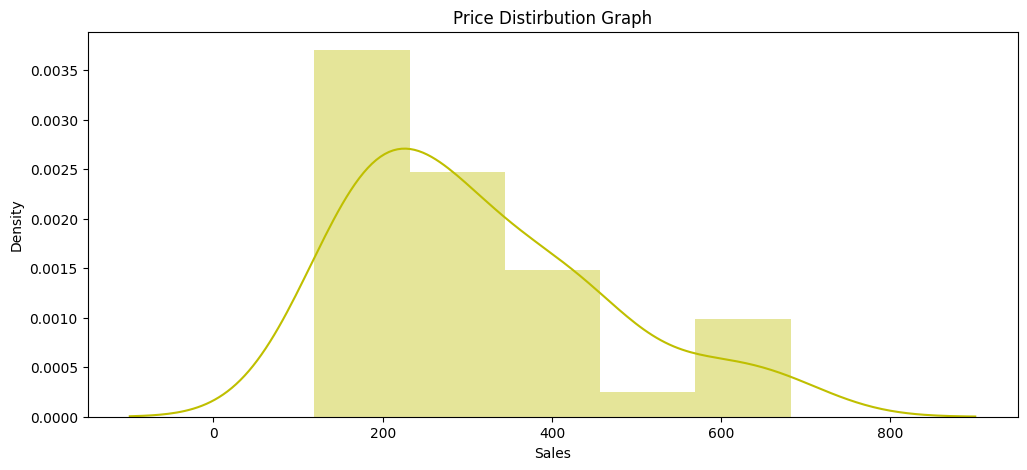

In [11]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["Sales"], color = 'y')

In [12]:
def ad_test(dataset):

    # The adfuller function performs the ADF test and allows you to specify an autolag parameter
    dftest = adfuller(dataset, autolag = 'AIC')
    
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
         
         
ad_test(df['Sales'])

1. ADF :  3.060142083641181
2. P-Value :  1.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 25
5. Critical Values :
	 1% :  -3.7238633119999998
	 5% :  -2.98648896
	 10% :  -2.6328004


# Step 4. Building ARIMA Model for Forecasting

In [13]:
#arima
stepwise_fit = auto_arima(df['Sales'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best 

In [14]:
#Separation of data set as test and train.

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [15]:
#Fitting the ARIMA Model

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=349.970807, expected=342.300000
predicted=286.003055, expected=339.700000
predicted=341.015454, expected=440.400000
predicted=341.819704, expected=315.900000
predicted=391.521270, expected=439.300000
predicted=339.753099, expected=401.300000
predicted=424.993908, expected=437.400000
predicted=387.268988, expected=575.500000
predicted=468.852028, expected=407.600000
predicted=503.761977, expected=682.000000
predicted=460.691662, expected=475.300000
predicted=613.988012, expected=581.300000
predicted=521.714870, expected=646.900000


In [16]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 90.986


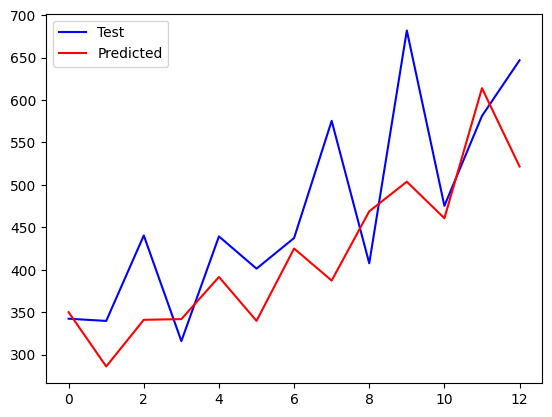

In [17]:
plt.plot(test, label='Test', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [18]:
#fitting seasonality and using auto sarima

from pmdarima import auto_arima

stepwise_fit_sarima = auto_arima(df['Sales'], seasonal=True, m=12, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=430.873, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=404.659, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=429.229, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=405.977, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=404.886, Time=0.44 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=402.858, Time=0.18 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=399.463, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=402.407, Time=0.12

In [19]:
predictions = []
history = [x for x in train] 
for t in range(len(test)):
    model = SARIMAX(history, order=(1,1,1), seasonal_order=(0,0,1,12), trend=None)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print(f'Predicted={yhat[0]:.6f}, Expected={obs:.6f}')  # Format correctly
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=372.043856, expected=342.300000
predicted=320.421667, expected=339.700000
predicted=384.334240, expected=440.400000
predicted=359.997111, expected=315.900000
predicted=340.566569, expected=439.300000
predicted=366.423921, expected=401.300000
predicted=375.089706, expected=437.400000
predicted=396.361469, expected=575.500000
predicted=453.934487, expected=407.600000
predicted=497.436762, expected=682.000000
predicted=441.105422, expected=475.300000
predicted=620.116657, expected=581.300000
predicted=525.274575, expected=646.900000


In [20]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 90.707


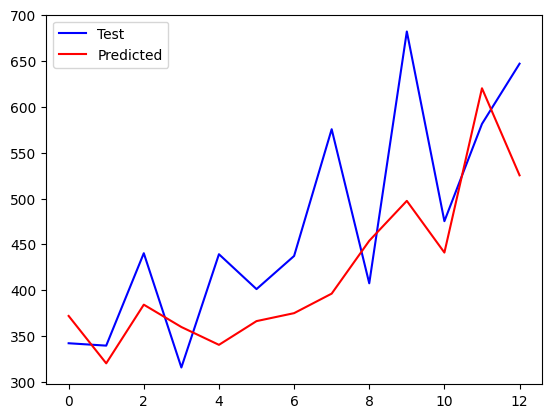

In [21]:
plt.plot(test, label='Test', color='blue')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

ARIMA provides slightly better results than SARIMA

Reference: https://medium.com/@i.cemozcelik/data-science-project-sales-forecasting-with-arima-model-67321d547866